In [1]:
import sys
sys.path.append("..")

from deepvideo import *

Using TensorFlow backend.


## Loading data

In [2]:
(X_train, y_train), (X_test, y_test) = get_ucf_dataset()

In [3]:
data = VideoLoader(16, input_shape=(16, 244, 244, 3), data_aug=get_augmentations(), label_mapping='../../UCF-101-dataset/Class Index.txt')

In [4]:
data.from_list('../../UCF-101-dataset/UCF-101-jpeg/', (X_train, y_train), (X_test, y_test))

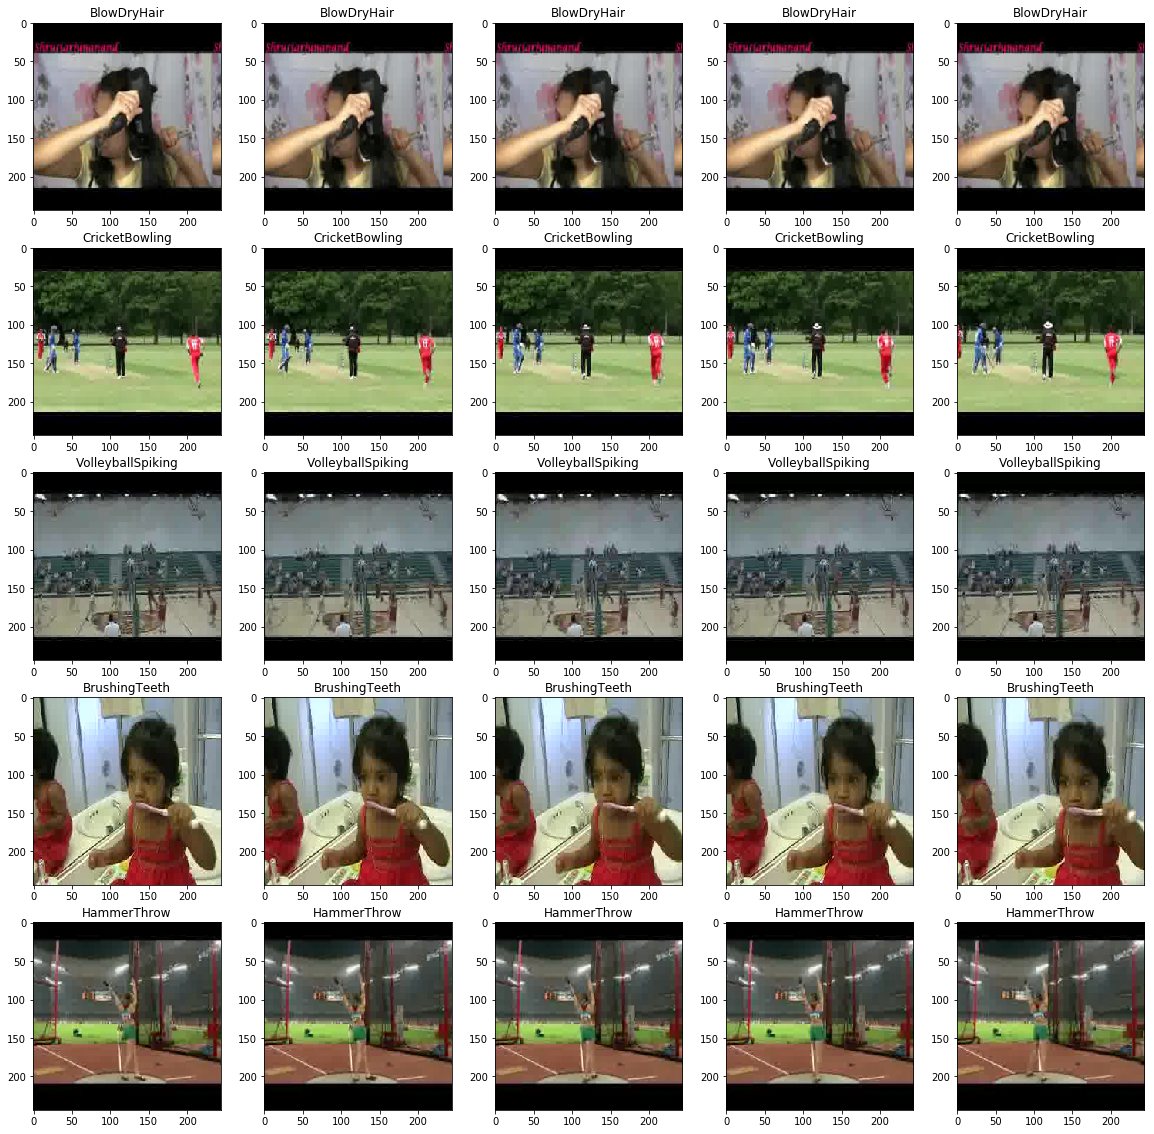

In [5]:
data.show_frames()

In [6]:
data.show_videos()

## Building tfrecord dataset

In [7]:
# data.build_tfrecord_dataset('../tfdataset', 10)

  0%|          | 0/2969 [00:00<?, ?it/s]

Making tfrecord dataset at ./tfdataset/train and ./tfdataset/val


100%|██████████| 117/117 [17:00<00:00,  8.66s/it]


In [7]:
data.use_tfrecord_as_generator('../tfdataset/')

## Defining the model

In [8]:
model = I3d_pretrained(classes=data.n_classes, input_shape=data.input_shape)

## Training

In [9]:
learner = VideoLearner(data, model)

In [10]:
learner.unfreeze()

In [11]:
learner.lr_find(2)

Epoch 1/2
407/595 [===================>..........] - ETA: 2:37 - loss: 4.0445 - acc: 0.1571

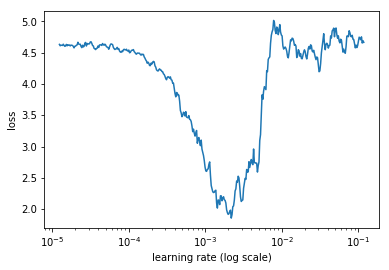

In [13]:
learner.recorder.plot_loss()

In [14]:
learner.fit_one_cycle(10, 0.0004, mode='triangular2')

Epoch 1/10
595/595 [==============================] - 558s 937ms/step - loss: 4.0029 - acc: 0.2693 - val_loss: 2.9541 - val_acc: 0.4950
Epoch 2/10
595/595 [==============================] - 550s 924ms/step - loss: 2.5192 - acc: 0.6546 - val_loss: 1.8179 - val_acc: 0.7214
Epoch 3/10
595/595 [==============================] - 550s 924ms/step - loss: 1.5432 - acc: 0.8138 - val_loss: 1.1728 - val_acc: 0.7987
Epoch 4/10
595/595 [==============================] - 565s 949ms/step - loss: 0.9600 - acc: 0.8850 - val_loss: 0.8439 - val_acc: 0.8332
Epoch 5/10
595/595 [==============================] - 557s 936ms/step - loss: 0.6524 - acc: 0.9124 - val_loss: 0.6764 - val_acc: 0.8504
Epoch 6/10
595/595 [==============================] - 553s 929ms/step - loss: 0.4563 - acc: 0.9362 - val_loss: 0.5632 - val_acc: 0.8665
Epoch 7/10
595/595 [==============================] - 551s 925ms/step - loss: 0.3285 - acc: 0.9544 - val_loss: 0.5070 - val_acc: 0.8761
Epoch 8/10
595/595 [============================

In [15]:
learner.save('../models/rgb/i3d_rgb_16f')

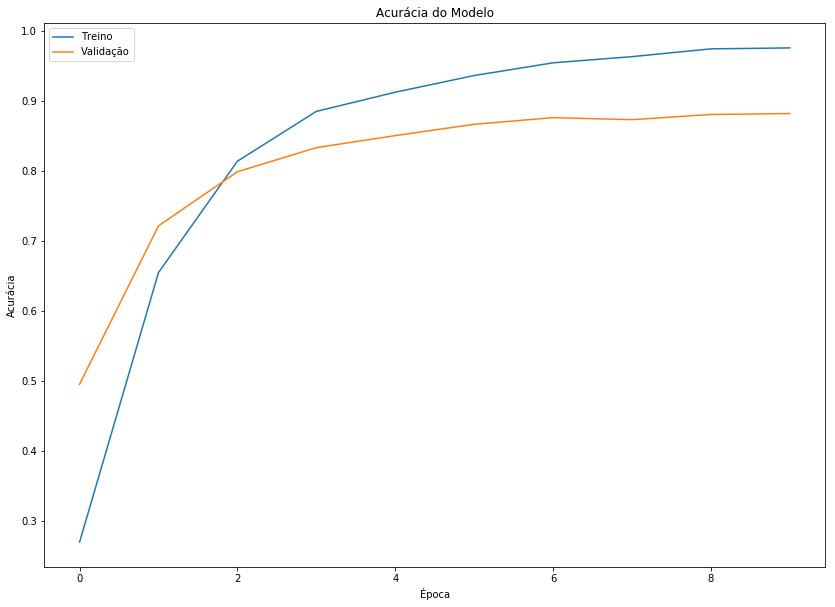

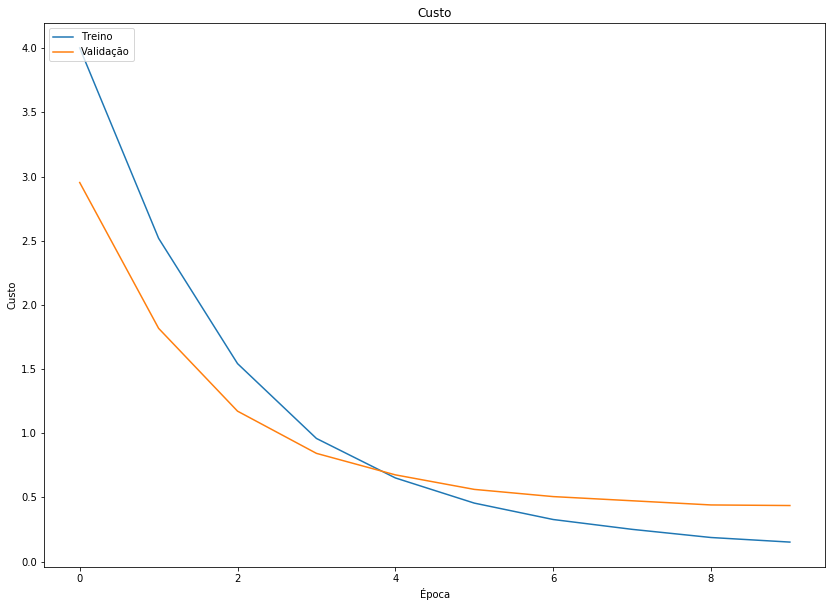

In [16]:
learner.plot_history()

In [17]:
learner.save_report('../models/rgb/i3d/')

In [ ]:
learner.load('../models/rgb/i3d/i3d_rgb_16f')

## Interpreting

In [11]:
interp = VideoClassifier(learner)

100%|██████████| 3783/3783 [1:43:45<00:00,  1.65s/it]


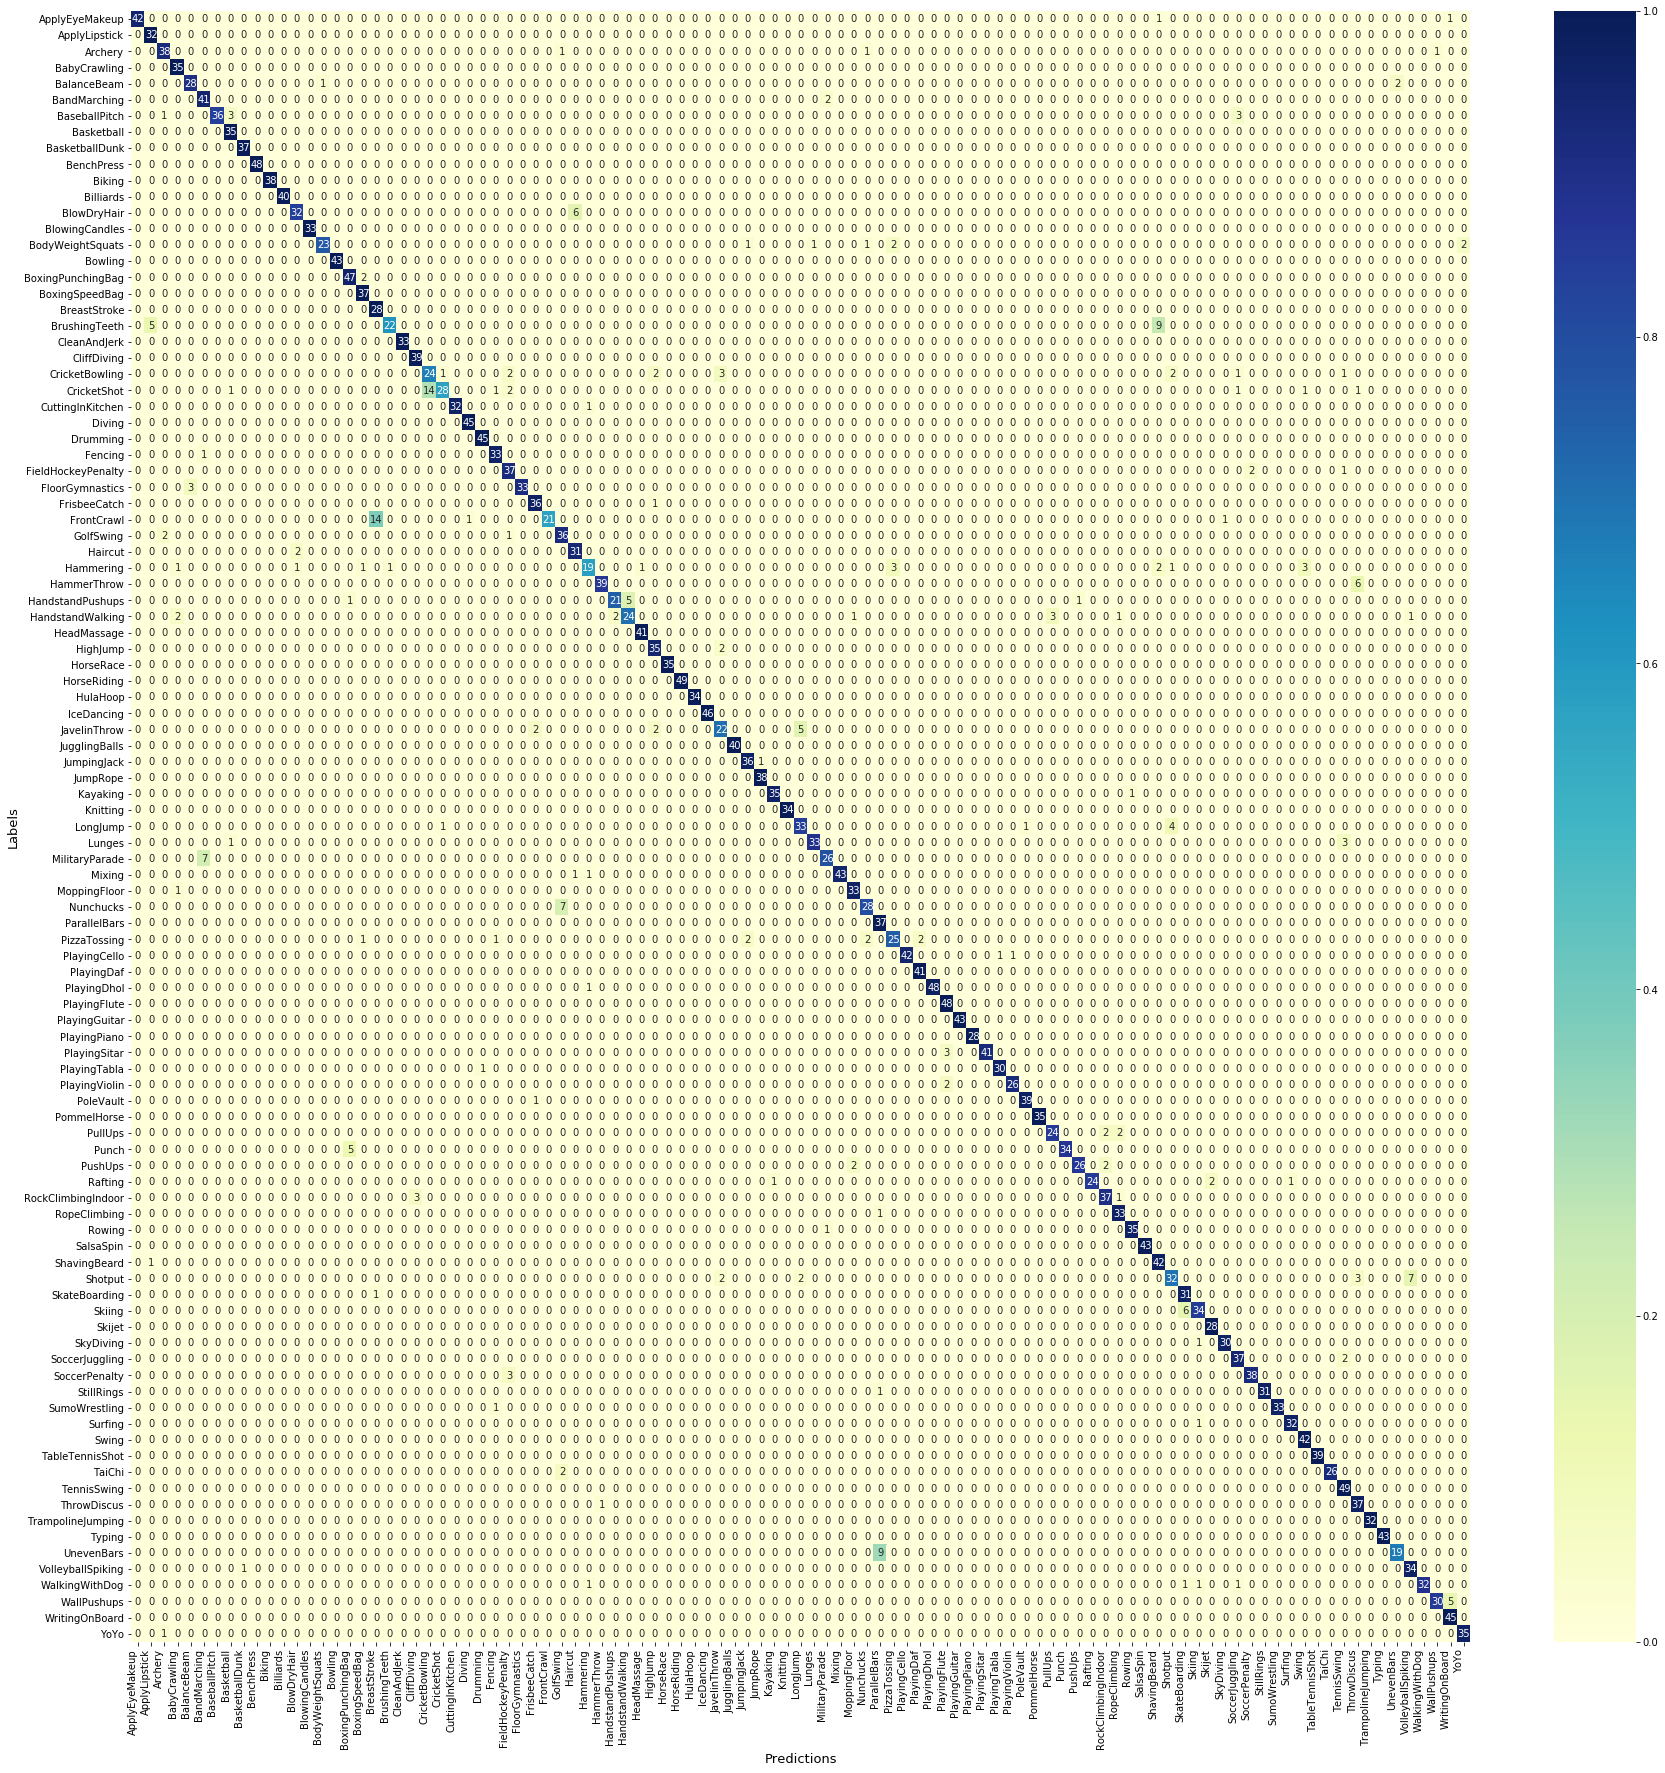

In [12]:
interp.plot_confusion_matrix()

In [13]:
interp.report()

Accuracy: 0.9257203277821835
                    precision    recall  f1-score   support

    ApplyEyeMakeup       1.00      0.95      0.98        44
     ApplyLipstick       0.84      1.00      0.91        32
           Archery       0.90      0.93      0.92        41
      BabyCrawling       0.90      1.00      0.95        35
       BalanceBeam       0.90      0.90      0.90        31
      BandMarching       0.84      0.95      0.89        43
     BaseballPitch       1.00      0.84      0.91        43
        Basketball       0.88      1.00      0.93        35
    BasketballDunk       0.97      1.00      0.99        37
        BenchPress       1.00      1.00      1.00        48
            Biking       1.00      1.00      1.00        38
         Billiards       1.00      1.00      1.00        40
       BlowDryHair       0.91      0.84      0.88        38
    BlowingCandles       1.00      1.00      1.00        33
  BodyWeightSquats       0.96      0.77      0.85        30
          